# End-user generated time series analysis using Zarr data in xarray

This notebook describes the python-based Zarr time series approach as part of the TRT-43 time series technology study. This notebook was adapted from the [Pangeo AGU Ocean Sciences 2020 tutorial](https://github.com/pangeo-gallery/osm2020tutorial) with credits below:

### Credits: Tutorial development
Dr. Chelle Gentemann - Twitter - Farallon Institute

Lucas Sterzinger - Twitter - University of California, Davis
  
### Compute Resources
This notebook was developed and run using an AWS m5.2xlarge instance as this is what was utilized in the Pangeo workshop via their OHW JupyterHub. This has 8 vCPU and 32 GB memory. 

# Dataset used: Multi-Scale Ultra High Resolution (MUR) Sea Surface Temperature (SST)

Found from the AWS Open Registry:

- Click here: [AWS Public Dataset](https://aws.amazon.com/opendata/)
- Click on `Find public available data on AWS` button
- Search for MUR
- Select [MUR SST](https://registry.opendata.aws/mur/)

 
 
 
 

-------------------------------------------------------

![](./awsmur.png)



## [MUR SST](https://podaac.jpl.nasa.gov/Multi-scale_Ultra-high_Resolution_MUR-SST) [AWS Public dataset program](https://registry.opendata.aws/mur/) 

### Access the MUR SST Zarr store which is in an s3 bucket.  

![image](https://podaac.jpl.nasa.gov/Podaac/thumbnails/MUR-JPL-L4-GLOB-v4.1.jpg)

We will start with my favorite Analysis Ready Data (ARD) format: [Zarr](https://zarr.readthedocs.io/en/stable/).  Using data stored in Zarr is fast, simple, and contains all the metadata normally in a netcdf file, so you can figure out easily what is in the datastore.  

- Fast - Zarr is fast because all the metadata is consolidated into a .json file.  Reading in massive datasets is lightning fast because it only reads the metadata and does read in data until it needs it for compute.

- Simple - Filenames?  Who needs them? Who cares?  Not I.  Simply point your read routine to the data directory.

- Metadata - all you want!

## Import Libraries

You may need to pip install these libraries depending on your python environment

In [2]:
pip install xarray[complete]
pip install s3fs
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [1]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

import dask
from dask.distributed import performance_report, Client, progress

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 


[fsspec.get_mapper](https://filesystem-spec.readthedocs.io/en/latest/api.html?highlight=get_mapper#fsspec.get_mapper) Creates a mapping between your computer and the s3 bucket.  This isn't necessary if the Zarr file is stored locally.

[xr.open_zarr](http://xarray.pydata.org/en/stable/generated/xarray.open_zarr.html) Reads a Zarr store into an Xarray dataset


## Open zarr dataset

In [2]:
%%time
file_location = 's3://mur-sst/zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

CPU times: user 2.7 s, sys: 109 ms, total: 2.81 s
Wall time: 3.67 s


,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## Testing scenarios

Based on https://wiki.earthdata.nasa.gov/display/TRT/Test+Scenarios

Spatial Constraints:



Single grid cell	(-129.995, 39.995, -129.995, 39.995)	/analysed_sst[][5000][5000];/time;/lat[5000];/lon[5000]	(-129.95, 39.95, -129.95, 39.95)	
10x10 grid cells	(-129.995, 39.995, -129.905, 39.905)	/analysed_sst[][5000:5009][5000:5009];/time;/lat[5000:5009];/lon[5000:5009]	(-129.95, 39.95, -129.86, 39.86)	
3x3 grid cells	(-129.995, 39.995, -129.975, 39.975)	/analysed_sst[][5000:5002][5000:5002];/time;/lat[5000:5002];/lon[5000:5002]	(-129.95, 39.95, -129.93, 39.93)	

Temporal Constraints


100	2003-01-01/2003-04-10	2000-06-01/2000-06-03
1000	
2003-01-01/2005-09-27

2000-06-01/2000-06-21
7014	2002-05-31/2021-08-12	
100000	
2000-06-01/2006-02-13
366625	
2000-06-01/2021-04-30
1,000,000	


### Test 1:
Single Grid Cell; 100 time slices

In [55]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2003-01-01','2003-04-10'),
                                            lat  = 40,
                                            lon  = -130 
                                           ).load()

CPU times: user 269 ms, sys: 132 ms, total: 401 ms
Wall time: 1.19 s


In [56]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 100)>
array([285.659  , 285.73898, 285.69098, 285.64398, 285.478  , 285.541  ,
       285.589  , 286.098  , 286.11798, 286.05   , 285.817  , 285.99   ,
       286.154  , 286.326  , 286.348  , 286.218  , 286.20398, 286.261  ,
       286.25598, 286.082  , 285.943  , 285.974  , 286.037  , 285.99   ,
       285.822  , 285.50998, 285.675  , 285.718  , 285.72998, 285.94598,
       285.828  , 285.779  , 285.891  , 285.719  , 285.763  , 285.637  ,
       285.391  , 285.11798, 285.155  , 285.184  , 285.192  , 285.113  ,
       284.938  , 284.86398, 285.042  , 285.086  , 284.987  , 285.123  ,
       285.19   , 285.149  , 285.11   , 285.21298, 285.24298, 285.336  ,
       285.414  , 285.36   , 285.031  , 284.741  , 285.02798, 285.082  ,
       285.039  , 284.97598, 285.099  , 285.109  , 284.98898, 284.90198,
       284.85   , 285.168  , 285.189  , 285.349  , 285.19598, 285.043  ,
       284.878  , 284.64798, 284.754  , 284.867  , 284.87698, 284.753  ,
       284.81   , 284.813  , 284.86   , 284.839  , 284.762  , 284.925  ,
       285.198  , 285.069  , 285.451  , 285.953  , 286.16998, 285.981  ,
       285.775  , 284.95398, 284.807  , 284.82098, 284.69098, 284.514  ,
       284.43298, 284.474  , 284.567  , 284.74   ], dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 -130.0
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-04-10T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

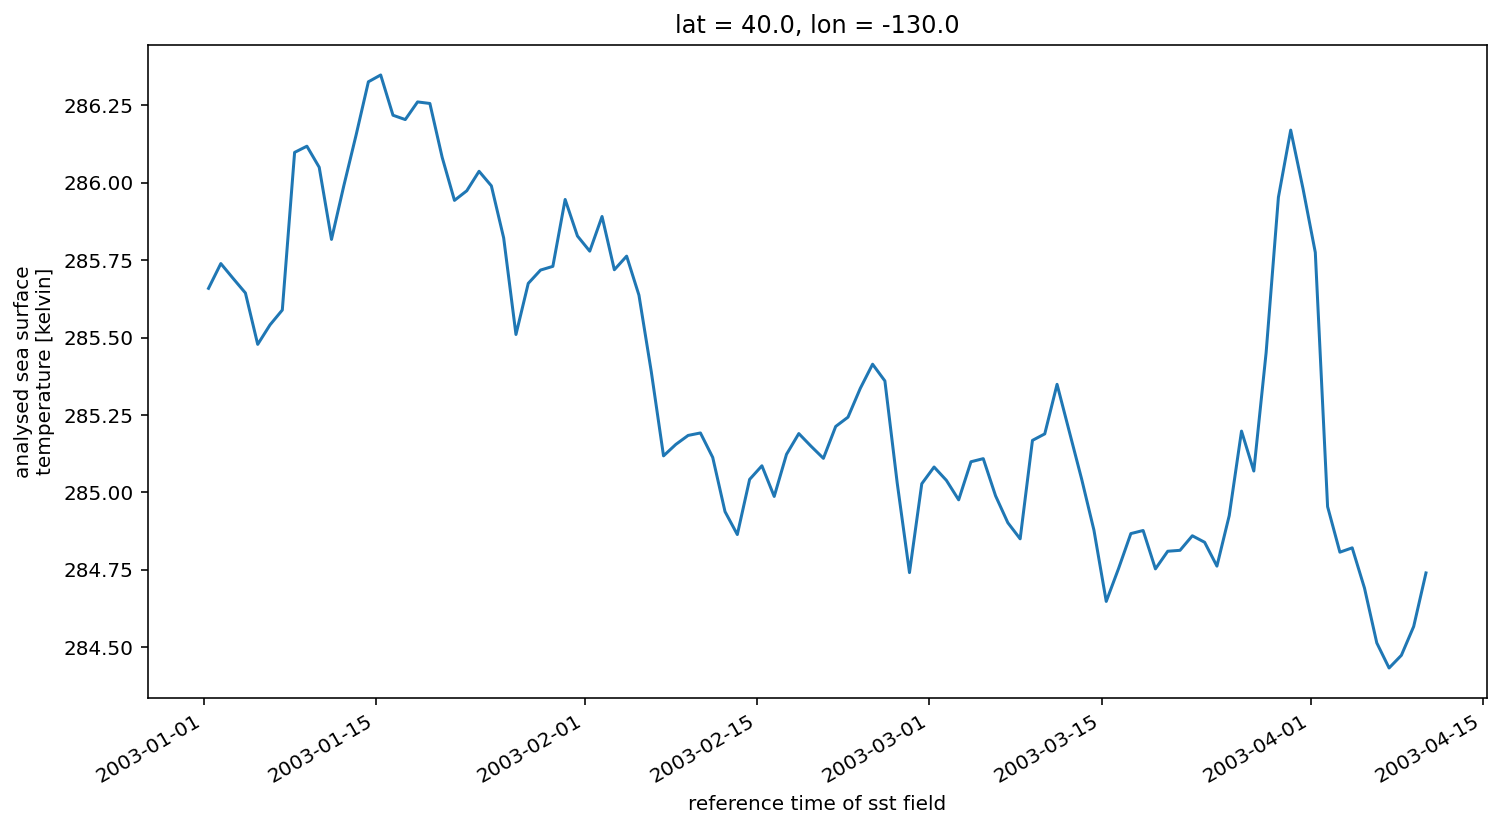

In [57]:
sst_timeseries.plot()

### Test 2:
Single Grid Cell; 1000 time slices

In [61]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2003-01-01','2005-09-26'),
                                            lat  = 40,
                                            lon  = -130 
                                           ).load()

CPU times: user 274 ms, sys: 295 ms, total: 569 ms
Wall time: 1.05 s


In [62]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 1000)>
array([285.659  , 285.73898, 285.69098, 285.64398, 285.478  , 285.541  ,
       285.589  , 286.098  , 286.11798, 286.05   , 285.817  , 285.99   ,
       286.154  , 286.326  , 286.348  , 286.218  , 286.20398, 286.261  ,
       286.25598, 286.082  , 285.943  , 285.974  , 286.037  , 285.99   ,
       285.822  , 285.50998, 285.675  , 285.718  , 285.72998, 285.94598,
       285.828  , 285.779  , 285.891  , 285.719  , 285.763  , 285.637  ,
       285.391  , 285.11798, 285.155  , 285.184  , 285.192  , 285.113  ,
       284.938  , 284.86398, 285.042  , 285.086  , 284.987  , 285.123  ,
       285.19   , 285.149  , 285.11   , 285.21298, 285.24298, 285.336  ,
       285.414  , 285.36   , 285.031  , 284.741  , 285.02798, 285.082  ,
       285.039  , 284.97598, 285.099  , 285.109  , 284.98898, 284.90198,
       284.85   , 285.168  , 285.189  , 285.349  , 285.19598, 285.043  ,
       284.878  , 284.64798, 284.754  , 284.867  , 284.87698, 284.753  ,
       284.81   , 284.813  , 284.86   , 284.839  , 284.762  , 284.925  ,
       285.198  , 285.069  , 285.451  , 285.953  , 286.16998, 285.981  ,
       285.775  , 284.95398, 284.807  , 284.82098, 284.69098, 284.514  ,
       284.43298, 284.474  , 284.567  , 284.74   , 284.874  , 284.817  ,
       284.931  , 284.97   , 285.12698, 285.08398, 285.284  , 285.426  ,
       285.452  , 285.521  , 285.50198, 285.507  , 285.475  , 285.34   ,
       285.253  , 285.162  , 285.123  , 285.065  , 285.13498, 285.166  ,
...
       287.58   , 287.718  , 287.705  , 287.72598, 287.64398, 287.53998,
       287.46698, 287.626  , 287.664  , 287.733  , 287.883  , 287.846  ,
       287.965  , 287.677  , 287.629  , 287.56198, 287.22998, 286.671  ,
       287.54898, 287.93298, 288.022  , 288.115  , 287.848  , 287.668  ,
       287.789  , 287.779  , 287.655  , 287.697  , 287.77798, 287.91   ,
       287.943  , 287.895  , 287.91498, 287.935  , 287.97   , 288.569  ,
       288.992  , 288.983  , 288.92398, 288.934  , 288.998  , 289.072  ,
       289.137  , 289.025  , 288.931  , 288.624  , 288.682  , 288.672  ,
       288.694  , 288.79898, 288.88   , 288.807  , 288.951  , 289.15698,
       289.225  , 289.201  , 289.104  , 289.642  , 289.625  , 289.611  ,
       289.672  , 289.732  , 290.169  , 290.233  , 290.359  , 290.349  ,
       290.365  , 290.378  , 290.438  , 290.494  , 290.479  , 290.423  ,
       290.412  , 290.038  , 290.005  , 289.93   , 290.22998, 290.44598,
       290.66   , 290.568  , 290.807  , 291.318  , 291.374  , 291.283  ,
       291.305  , 291.41098, 291.57498, 291.728  , 291.727  , 291.665  ,
       291.783  , 291.738  , 291.708  , 291.57498, 291.82098, 291.919  ,
       291.899  , 291.472  , 291.36798, 291.41098, 291.62698, 291.642  ,
       291.66998, 291.763  , 291.675  , 291.363  , 291.525  , 291.53198,
       291.535  , 291.544  , 291.64798, 291.712  , 291.66   , 291.762  ,
       291.639  , 291.425  , 291.215  , 291.051  ], dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 -130.0
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2005-09-26T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

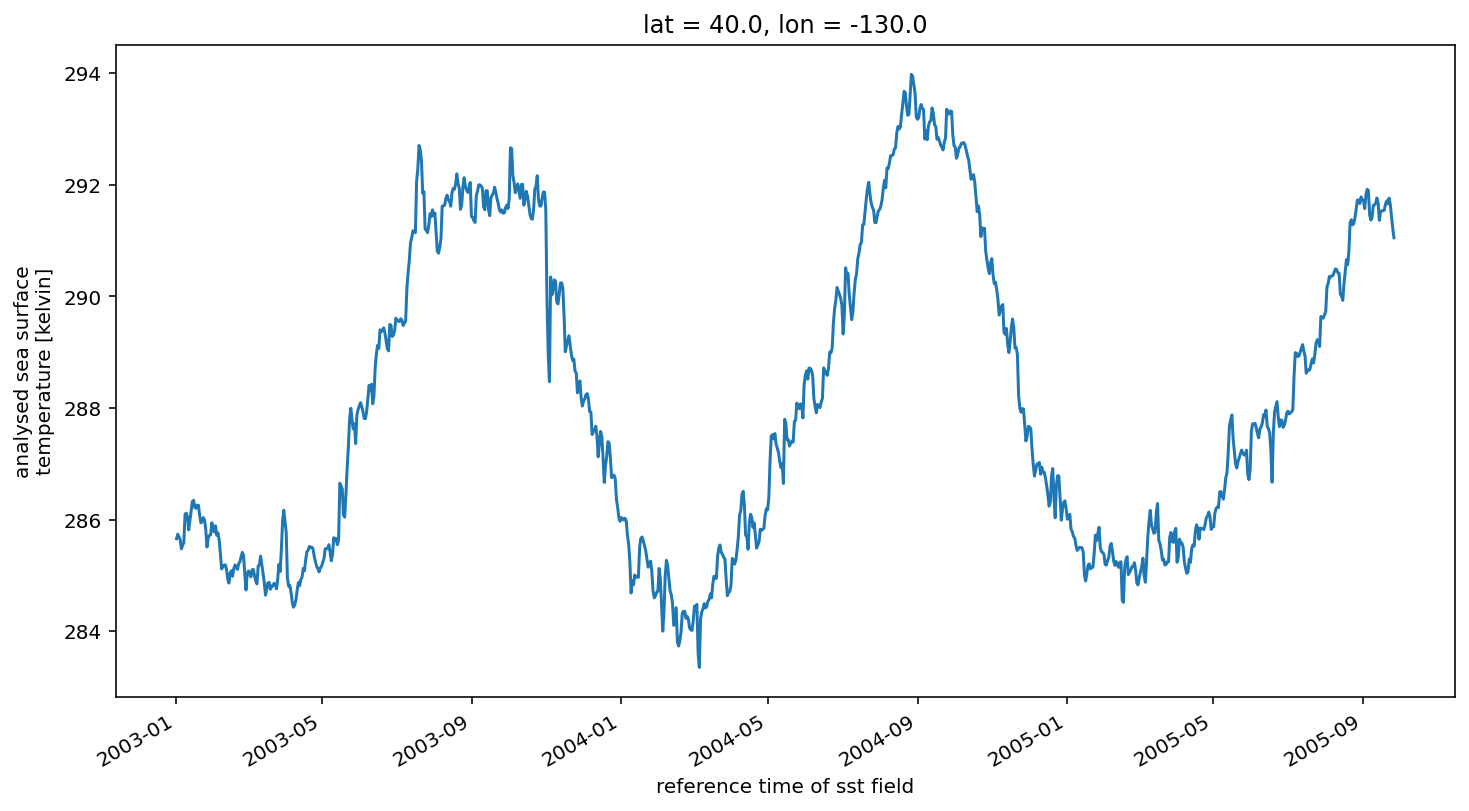

In [63]:
sst_timeseries.plot()

### Test 3:
Single Grid Cell; 6443 time slices

**Note that the temporal extent of the Zarr store is 2002-06-01 to 2020-01-20. This results in only 6443 time steps even though our testing contraints are set at 7014 for the entire temporal range of the native collection.**

In [64]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2002-05-31','2021-08-12'),
                                            lat  = 40,
                                            lon  = -130 
                                           ).load()

CPU times: user 305 ms, sys: 140 ms, total: 446 ms
Wall time: 980 ms


In [65]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 6443)>
array([286.425  , 285.87   , 285.901  , ..., 285.66498, 285.53998,
       285.666  ], dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 -130.0
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

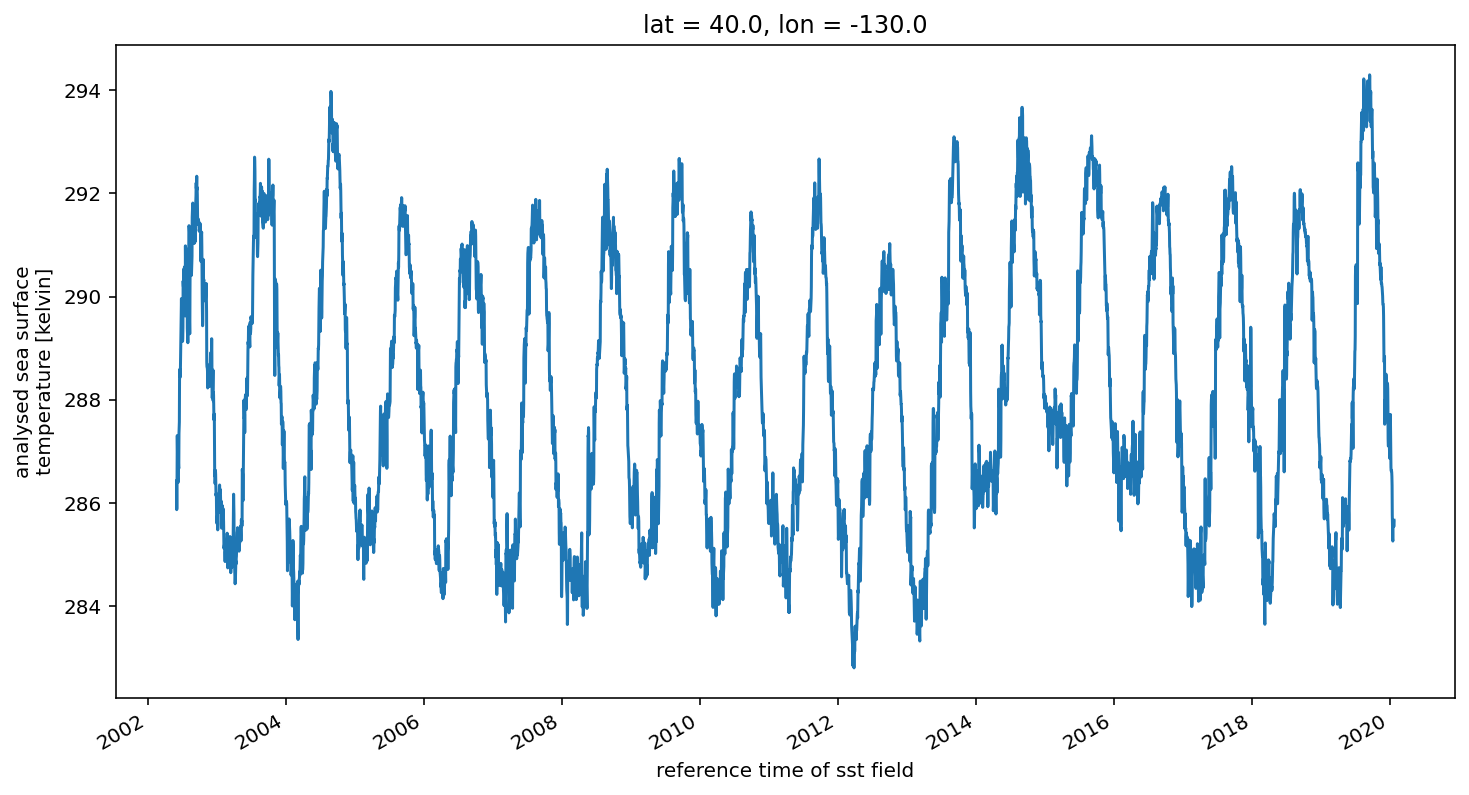

In [67]:
sst_timeseries.plot()

### Test 4:
3x3 grid cells; 100 time slices

In [73]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2003-01-01','2003-04-10'),
                                            lat  = slice(39.975,40),
                                            lon  = slice(-130,-129.974) 
                                           ).load()

CPU times: user 525 ms, sys: 256 ms, total: 781 ms
Wall time: 1.22 s


In [71]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 100, lat: 3, lon: 3)>
array([[[285.673  , 285.676  , 285.67798],
        [285.662  , 285.668  , 285.673  ],
        [285.659  , 285.668  , 285.675  ]],

       [[285.742  , 285.741  , 285.74   ],
        [285.74   , 285.73898, 285.738  ],
        [285.73898, 285.738  , 285.737  ]],

       [[285.685  , 285.688  , 285.689  ],
        [285.689  , 285.69   , 285.69   ],
        [285.69098, 285.69098, 285.689  ]],

       [[285.603  , 285.613  , 285.617  ],
        [285.636  , 285.63998, 285.639  ],
        [285.64398, 285.645  , 285.64398]],

       [[285.44   , 285.444  , 285.44998],
        [285.471  , 285.474  , 285.475  ],
        [285.478  , 285.484  , 285.486  ]],

...

       [[284.50198, 284.509  , 284.516  ],
        [284.508  , 284.51498, 284.522  ],
        [284.514  , 284.521  , 284.52798]],

       [[284.452  , 284.46   , 284.468  ],
        [284.443  , 284.451  , 284.45898],
        [284.43298, 284.442  , 284.44998]],

       [[284.505  , 284.52298, 284.541  ],
        [284.49   , 284.507  , 284.525  ],
        [284.474  , 284.491  , 284.509  ]],

       [[284.611  , 284.641  , 284.673  ],
        [284.59   , 284.619  , 284.649  ],
        [284.567  , 284.596  , 284.625  ]],

       [[284.77   , 284.781  , 284.793  ],
        [284.755  , 284.764  , 284.774  ],
        [284.74   , 284.748  , 284.75598]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 39.98 39.99 40.0
  * lon      (lon) float32 -130.0 -129.99 -129.98
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-04-10T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

(array([ 32.,  80., 144., 189.,  71.,  48., 105.,  87.,  84.,  60.]),
 array([284.43298, 284.62448, 284.81598, 285.00748, 285.19897, 285.3905 ,
        285.582  , 285.7735 , 285.965  , 286.1565 , 286.348  ],
       dtype=float32),
 <BarContainer object of 10 artists>)

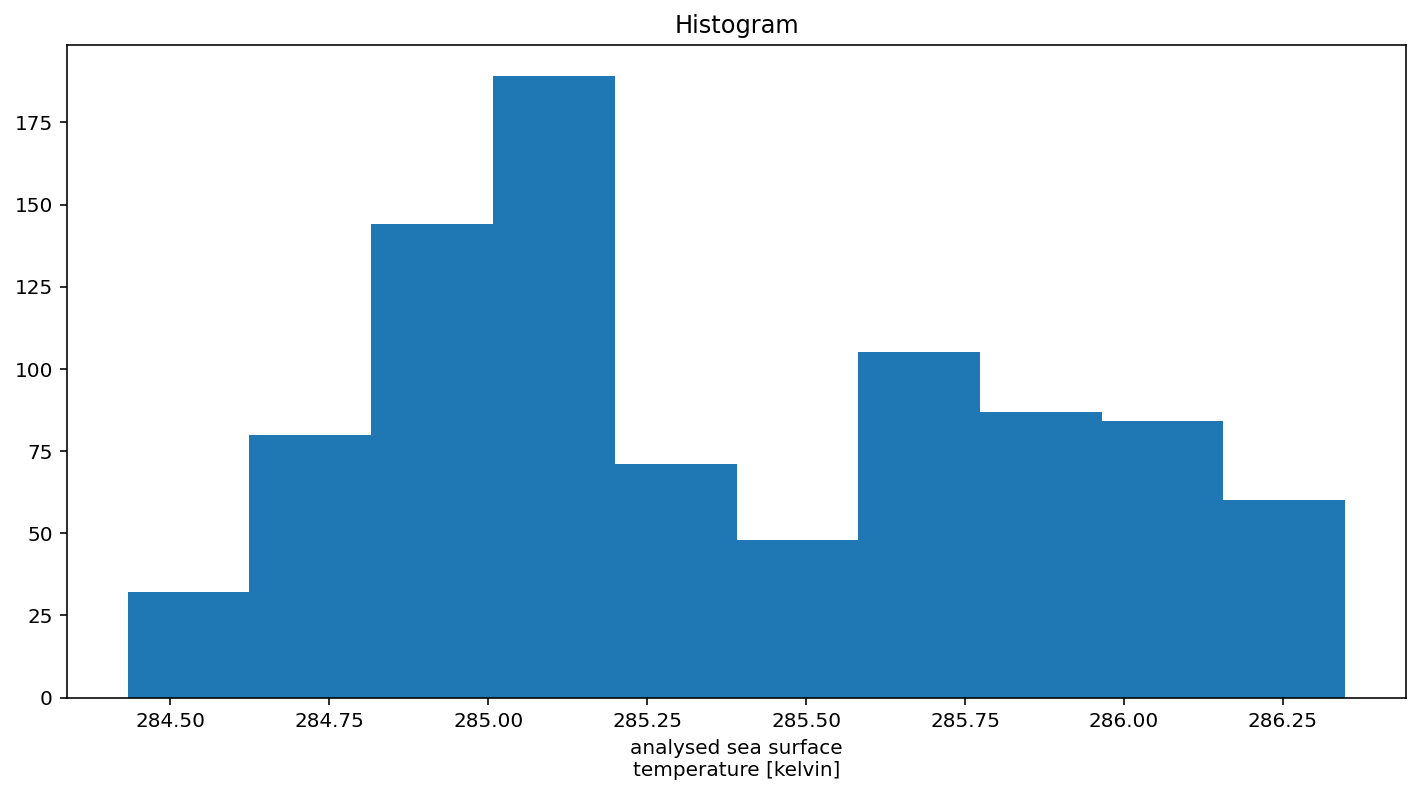

In [72]:
sst_timeseries.plot()

### Test 5:
3x3 grid cells; 1000 time slices

In [76]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2003-01-01','2005-09-26'),
                                            lat  = slice(39.975,40),
                                            lon  = slice(-130,-129.974) 
                                           ).load()

CPU times: user 546 ms, sys: 304 ms, total: 850 ms
Wall time: 1.03 s


In [77]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 1000, lat: 3, lon: 3)>
array([[[285.673  , 285.676  , 285.67798],
        [285.662  , 285.668  , 285.673  ],
        [285.659  , 285.668  , 285.675  ]],

       [[285.742  , 285.741  , 285.74   ],
        [285.74   , 285.73898, 285.738  ],
        [285.73898, 285.738  , 285.737  ]],

       [[285.685  , 285.688  , 285.689  ],
        [285.689  , 285.69   , 285.69   ],
        [285.69098, 285.69098, 285.689  ]],

       ...,

       [[291.548  , 291.531  , 291.50598],
        [291.47598, 291.451  , 291.426  ],
        [291.425  , 291.40698, 291.396  ]],

       [[291.25998, 291.227  , 291.18298],
        [291.229  , 291.192  , 291.145  ],
        [291.215  , 291.179  , 291.134  ]],

       [[291.04   , 291.017  , 290.994  ],
        [291.044  , 291.022  , 290.999  ],
        [291.051  , 291.031  , 291.009  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 39.98 39.99 40.0
  * lon      (lon) float32 -130.0 -129.99 -129.98
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2005-09-26T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

(array([ 195., 1847., 1571.,  798.,  944.,  794.,  574., 1158.,  792.,
         327.]),
 array([283.34   , 284.40408, 285.4682 , 286.5323 , 287.5964 , 288.6605 ,
        289.72458, 290.7887 , 291.85278, 292.9169 , 293.981  ],
       dtype=float32),
 <BarContainer object of 10 artists>)

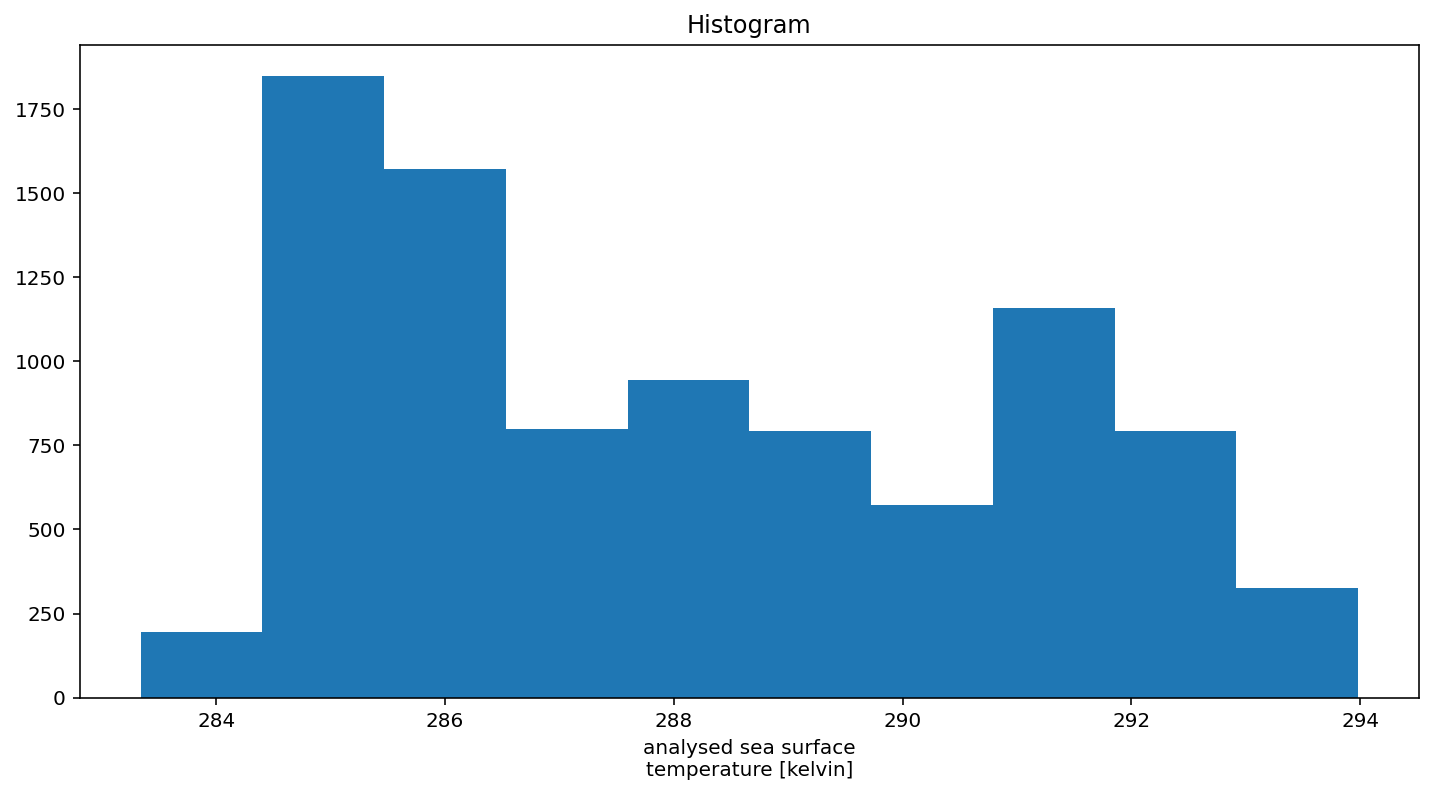

In [78]:
sst_timeseries.plot()

### Test 6:
3x3 grid cells; 6443 time slices

**Note that the temporal extent of the Zarr store is 2002-06-01 to 2020-01-20. This results in only 6443 time steps even though our testing contraints are set at 7014 for the entire temporal range of the native collection.**

In [79]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2002-05-31','2021-08-12'),
                                            lat  = slice(39.975,40),
                                            lon  = slice(-130,-129.974) 
                                           ).load()

CPU times: user 537 ms, sys: 316 ms, total: 853 ms
Wall time: 1.11 s


In [80]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 6443, lat: 3, lon: 3)>
array([[[286.417  , 286.434  , 286.45398],
        [286.422  , 286.443  , 286.46698],
        [286.425  , 286.448  , 286.475  ]],

       [[285.874  , 285.886  , 285.904  ],
        [285.876  , 285.88998, 285.91098],
        [285.87   , 285.884  , 285.904  ]],

       [[285.914  , 285.929  , 285.952  ],
        [285.90298, 285.921  , 285.94598],
        [285.901  , 285.917  , 285.938  ]],

       ...,

       [[285.721  , 285.716  , 285.711  ],
        [285.693  , 285.689  , 285.684  ],
        [285.66498, 285.66098, 285.658  ]],

       [[285.554  , 285.54898, 285.544  ],
        [285.548  , 285.542  , 285.535  ],
        [285.53998, 285.533  , 285.524  ]],

       [[285.63998, 285.632  , 285.625  ],
        [285.654  , 285.642  , 285.632  ],
        [285.666  , 285.652  , 285.638  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 39.98 39.99 40.0
  * lon      (lon) float32 -130.0 -129.99 -129.98
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

(array([ 736., 7766., 8788., 8353., 6972., 6022., 7427., 7778., 3295.,
         850.]),
 array([282.80298, 283.95258, 285.10217, 286.25177, 287.40137, 288.55096,
        289.7006 , 290.8502 , 291.9998 , 293.14938, 294.29898],
       dtype=float32),
 <BarContainer object of 10 artists>)

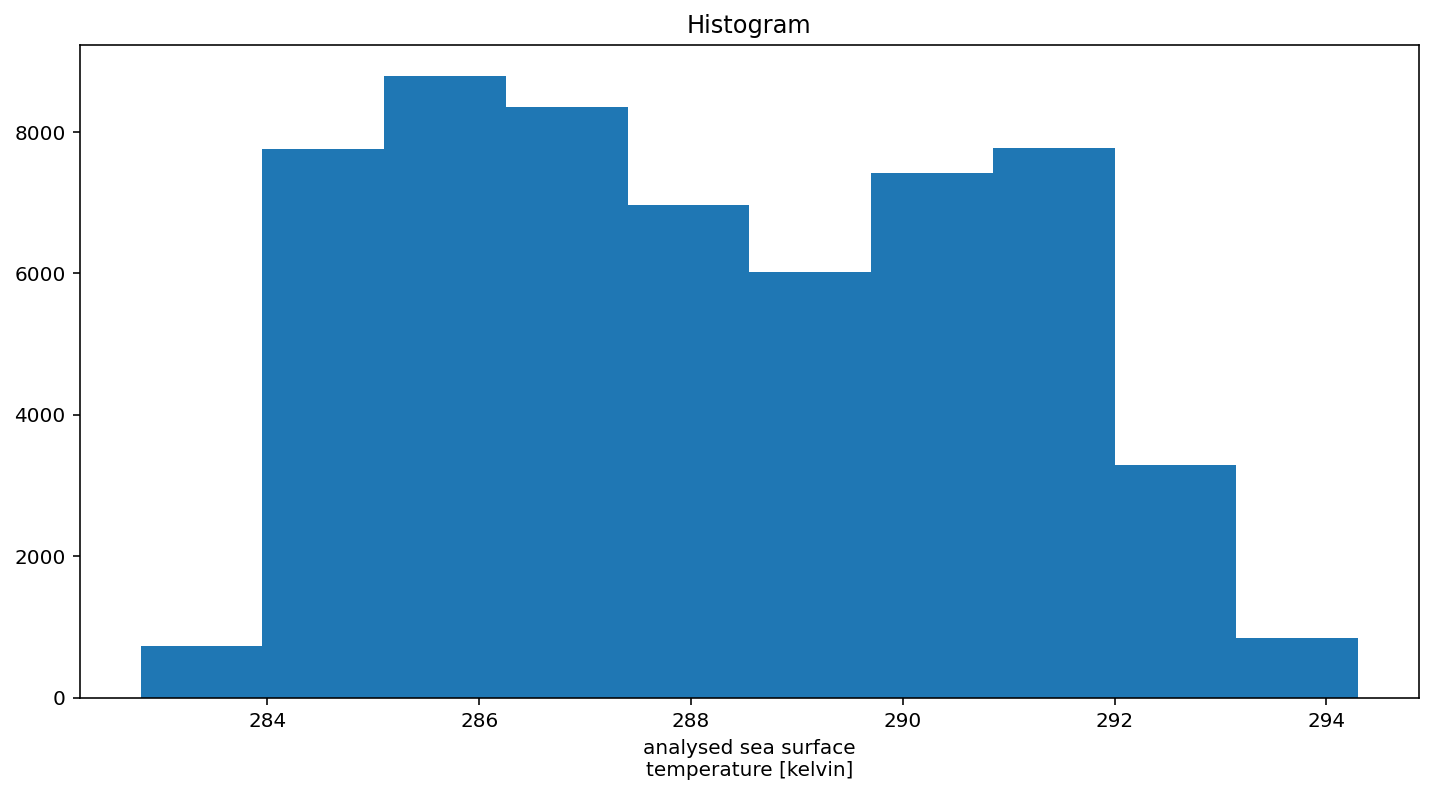

In [81]:
sst_timeseries.plot()

### Test 7:
10x10 grid cells; 100 time slices

In [86]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2003-01-01','2003-04-10'),
                                            lat  = slice(39.905,40),
                                            lon  = slice(-130,-129.91) 
                                           ).load()

CPU times: user 653 ms, sys: 273 ms, total: 926 ms
Wall time: 1.03 s


In [87]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 100, lat: 10, lon: 10)>
array([[[285.809  , 285.815  , 285.819  , ..., 285.78198, 285.774  ,
         285.77   ],
        [285.792  , 285.798  , 285.8    , ..., 285.759  , 285.749  ,
         285.74298],
        [285.772  , 285.77798, 285.78   , ..., 285.737  , 285.72598,
         285.71698],
        ...,
        [285.673  , 285.676  , 285.67798, ..., 285.667  , 285.656  ,
         285.643  ],
        [285.662  , 285.668  , 285.673  , ..., 285.669  , 285.66   ,
         285.65   ],
        [285.659  , 285.668  , 285.675  , ..., 285.67798, 285.672  ,
         285.664  ]],

       [[285.763  , 285.762  , 285.75998, ..., 285.751  , 285.749  ,
         285.74698],
        [285.75998, 285.759  , 285.757  , ..., 285.74698, 285.745  ,
         285.74298],
        [285.75598, 285.755  , 285.754  , ..., 285.744  , 285.741  ,
         285.73898],
...
        [284.611  , 284.641  , 284.673  , ..., 284.849  , 284.889  ,
         284.932  ],
        [284.59   , 284.619  , 284.649  , ..., 284.81598, 284.85098,
         284.889  ],
        [284.567  , 284.596  , 284.625  , ..., 284.78198, 284.814  ,
         284.849  ]],

       [[284.884  , 284.901  , 284.922  , ..., 285.065  , 285.09198,
         285.117  ],
        [284.866  , 284.883  , 284.90298, ..., 285.043  , 285.073  ,
         285.1    ],
        [284.849  , 284.866  , 284.88498, ..., 285.024  , 285.057  ,
         285.08798],
        ...,
        [284.77   , 284.781  , 284.793  , ..., 284.87698, 284.90198,
         284.93698],
        [284.755  , 284.764  , 284.774  , ..., 284.837  , 284.849  ,
         284.873  ],
        [284.74   , 284.748  , 284.75598, ..., 284.802  , 284.81   ,
         284.82898]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 39.91 39.92 39.93 39.94 ... 39.97 39.98 39.99 40.0
  * lon      (lon) float32 -130.0 -129.99 -129.98 ... -129.93 -129.92 -129.91
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2003-04-10T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

(array([14389400.,        0.,    44523.,   170815.,   477039.,   450821.,
         1104460.,  4793412.,  1747507.,   213923.]),
 array([265.382  , 268.3609 , 271.33978, 274.3187 , 277.29758, 280.2765 ,
        283.2554 , 286.23428, 289.2132 , 292.19208, 295.171  ],
       dtype=float32),
 <BarContainer object of 10 artists>)

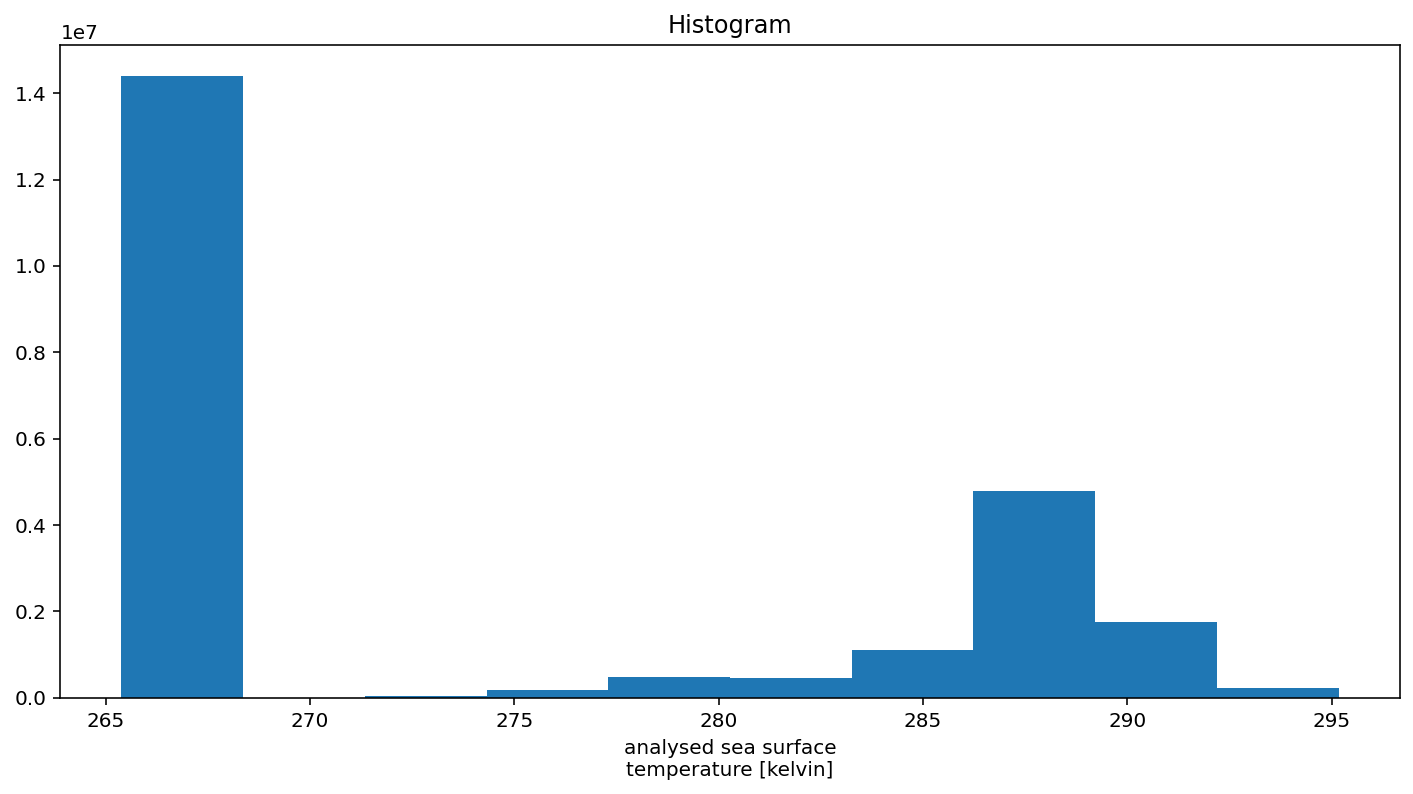

In [30]:
sst_timeseries.plot()

### Test 8:
10x10 grid cells; 1000 time slices

In [88]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2003-01-01','2005-09-26'),
                                            lat  = slice(39.905,40),
                                            lon  = slice(-130,-129.91) 
                                           ).load()

CPU times: user 587 ms, sys: 298 ms, total: 885 ms
Wall time: 1.03 s


In [89]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 1000, lat: 10, lon: 10)>
array([[[285.809  , 285.815  , 285.819  , ..., 285.78198, 285.774  ,
         285.77   ],
        [285.792  , 285.798  , 285.8    , ..., 285.759  , 285.749  ,
         285.74298],
        [285.772  , 285.77798, 285.78   , ..., 285.737  , 285.72598,
         285.71698],
        ...,
        [285.673  , 285.676  , 285.67798, ..., 285.667  , 285.656  ,
         285.643  ],
        [285.662  , 285.668  , 285.673  , ..., 285.669  , 285.66   ,
         285.65   ],
        [285.659  , 285.668  , 285.675  , ..., 285.67798, 285.672  ,
         285.664  ]],

       [[285.763  , 285.762  , 285.75998, ..., 285.751  , 285.749  ,
         285.74698],
        [285.75998, 285.759  , 285.757  , ..., 285.74698, 285.745  ,
         285.74298],
        [285.75598, 285.755  , 285.754  , ..., 285.744  , 285.741  ,
         285.73898],
...
        [291.25998, 291.227  , 291.18298, ..., 290.91998, 290.953  ,
         291.005  ],
        [291.229  , 291.192  , 291.145  , ..., 290.86398, 290.90698,
         290.969  ],
        [291.215  , 291.179  , 291.134  , ..., 290.884  , 290.916  ,
         290.966  ]],

       [[291.041  , 291.005  , 290.972  , ..., 290.914  , 290.91998,
         290.926  ],
        [291.038  , 291.005  , 290.974  , ..., 290.913  , 290.916  ,
         290.91998],
        [291.03598, 291.007  , 290.97998, ..., 290.915  , 290.914  ,
         290.916  ],
        ...,
        [291.04   , 291.017  , 290.994  , ..., 290.904  , 290.904  ,
         290.90698],
        [291.044  , 291.022  , 290.999  , ..., 290.905  , 290.906  ,
         290.91   ],
        [291.051  , 291.031  , 291.009  , ..., 290.91998, 290.918  ,
         290.919  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 39.91 39.92 39.93 39.94 ... 39.97 39.98 39.99 40.0
  * lon      (lon) float32 -130.0 -129.99 -129.98 ... -129.93 -129.92 -129.91
  * time     (time) datetime64[ns] 2003-01-01T09:00:00 ... 2005-09-26T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

(array([ 2378., 20120., 17569.,  9019., 10509.,  8827.,  6156., 13195.,
         8317.,  3910.]),
 array([283.33398, 284.39868, 285.46338, 286.52808, 287.59277, 288.65747,
        289.7222 , 290.7869 , 291.8516 , 292.9163 , 293.981  ],
       dtype=float32),
 <BarContainer object of 10 artists>)

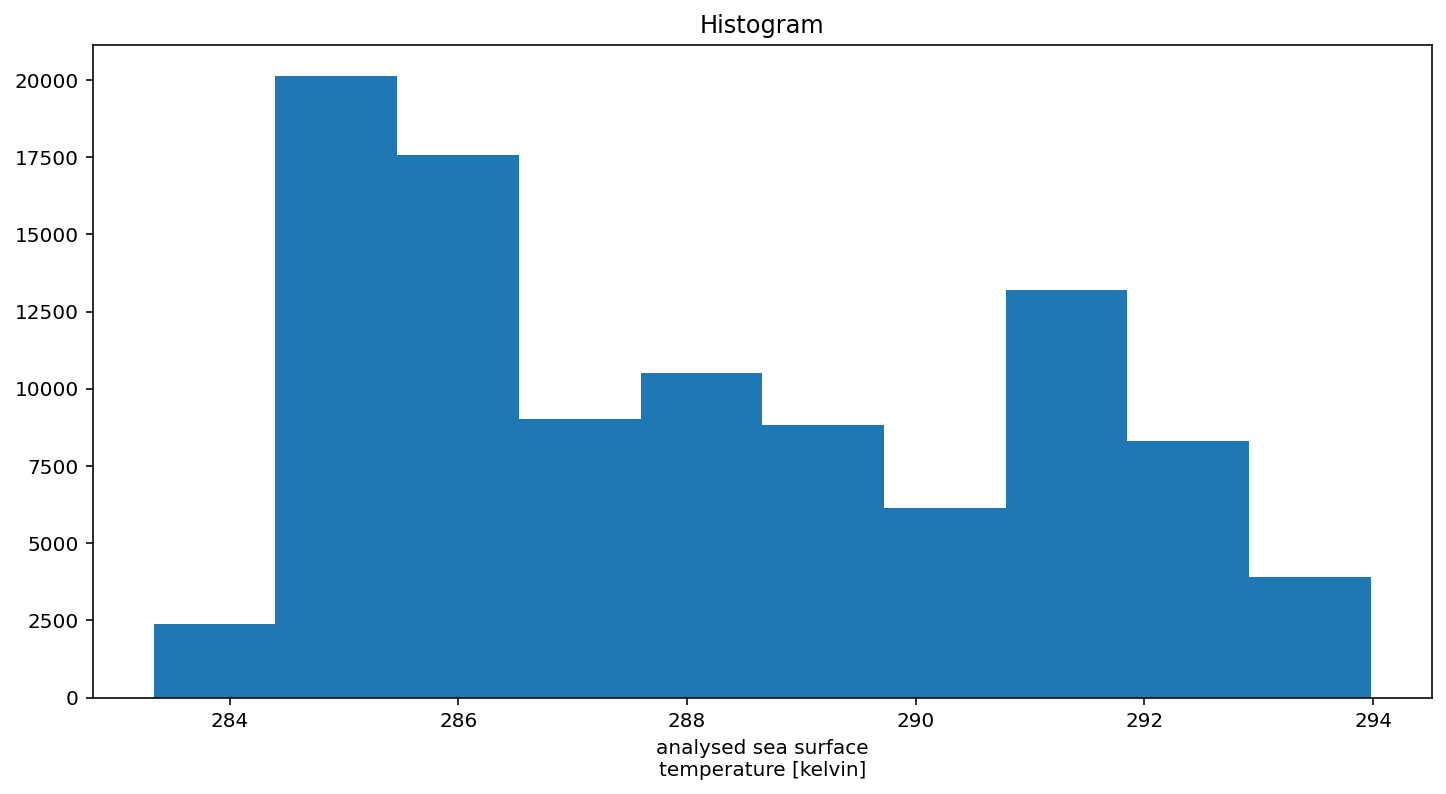

In [90]:
sst_timeseries.plot()

### Test 9:
10x10 grid cells; 6443 time slices

**Note that the temporal extent of the Zarr store is 2002-06-01 to 2020-01-20. This results in only 6443 time steps even though our testing contraints are set at 7014 for the entire temporal range of the native collection.**

In [91]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2002-05-31','2021-08-12'),
                                            lat  = slice(39.905,40),
                                            lon  = slice(-130,-129.91) 
                                           ).load()

CPU times: user 573 ms, sys: 289 ms, total: 863 ms
Wall time: 1.11 s


In [92]:
sst_timeseries

<xarray.DataArray 'analysed_sst' (time: 6443, lat: 10, lon: 10)>
array([[[286.421  , 286.413  , 286.405  , ..., 286.376  , 286.37   ,
         286.363  ],
        [286.409  , 286.40298, 286.397  , ..., 286.383  , 286.379  ,
         286.373  ],
        [286.402  , 286.399  , 286.397  , ..., 286.40298, 286.4    ,
         286.39398],
        ...,
        [286.417  , 286.434  , 286.45398, ..., 286.538  , 286.539  ,
         286.53   ],
        [286.422  , 286.443  , 286.46698, ..., 286.56   , 286.554  ,
         286.539  ],
        [286.425  , 286.448  , 286.475  , ..., 286.58798, 286.573  ,
         286.547  ]],

       [[285.92398, 285.901  , 285.883  , ..., 285.88098, 285.887  ,
         285.893  ],
        [285.89398, 285.87698, 285.86398, ..., 285.893  , 285.906  ,
         285.916  ],
        [285.878  , 285.866  , 285.858  , ..., 285.917  , 285.93698,
         285.95398],
...
        [285.554  , 285.54898, 285.544  , ..., 285.505  , 285.494  ,
         285.483  ],
        [285.548  , 285.542  , 285.535  , ..., 285.48898, 285.477  ,
         285.465  ],
        [285.53998, 285.533  , 285.524  , ..., 285.472  , 285.46   ,
         285.447  ]],

       [[285.573  , 285.589  , 285.604  , ..., 285.642  , 285.646  ,
         285.65   ],
        [285.574  , 285.58798, 285.6    , ..., 285.632  , 285.63498,
         285.638  ],
        [285.58   , 285.59   , 285.599  , ..., 285.625  , 285.62698,
         285.628  ],
        ...,
        [285.63998, 285.632  , 285.625  , ..., 285.594  , 285.589  ,
         285.58398],
        [285.654  , 285.642  , 285.632  , ..., 285.589  , 285.582  ,
         285.57498],
        [285.666  , 285.652  , 285.638  , ..., 285.583  , 285.574  ,
         285.56598]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 39.91 39.92 39.93 39.94 ... 39.97 39.98 39.99 40.0
  * lon      (lon) float32 -130.0 -129.99 -129.98 ... -129.93 -129.92 -129.91
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

(array([ 7933., 86708., 99047., 91908., 79244., 67972., 84942., 84630.,
        33867.,  8049.]),
 array([282.80298, 283.9615 , 285.12   , 286.27847, 287.43698, 288.5955 ,
        289.754  , 290.9125 , 292.07098, 293.2295 , 294.388  ],
       dtype=float32),
 <BarContainer object of 10 artists>)

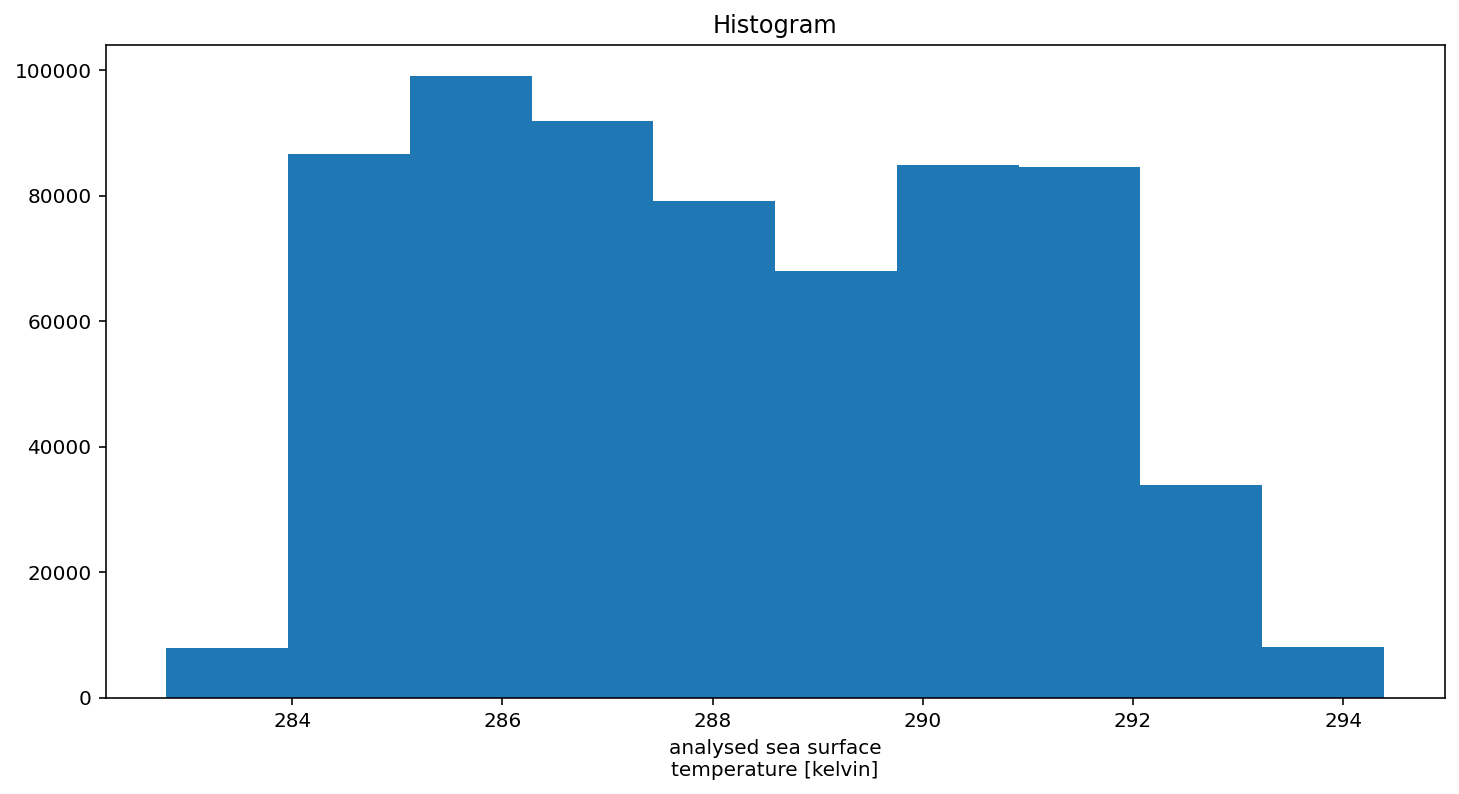

In [93]:
sst_timeseries.plot()

# The rest of this notebook is a copy from the Pangeo notebook referenced above.

### Read entire 10 years of data at 1 point.

Select the ``analysed_sst`` variable over a specific time period, `lat`, and `lon` and load the data into memory.  This is small enough to load into memory which will make calculating climatologies easier in the next step.

CPU times: user 299 ms, sys: 159 ms, total: 458 ms
Wall time: 2.5 s


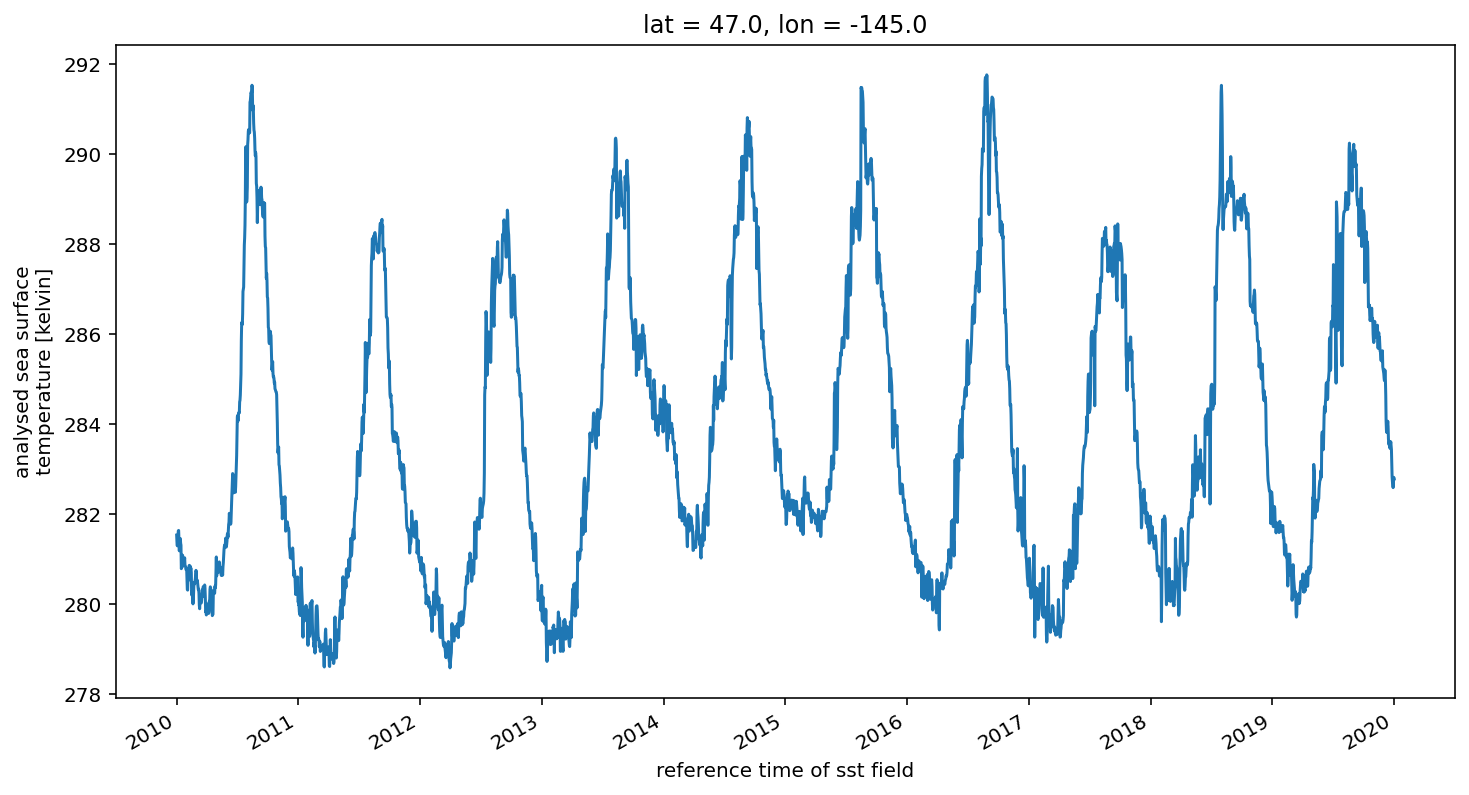

In [94]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2010-01-01','2020-01-01'),
                                            lat  = 47,
                                            lon  = -145
                                           ).load()

sst_timeseries.plot()

### The anomaly is more interesting...  

Use [.groupby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html#xarray-dataarray-groupby) method to calculate the climatology and [.resample](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html#xarray-dataset-resample) method to then average it into 1-month bins.
- [DataArray.mean](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html#xarray-dataarray-mean) arguments are important! Xarray uses metadata to plot, so keep_attrs is a nice feature.  Also, for SST there are regions with changing sea ice.  Setting skipna = False removes these regions. 

CPU times: user 426 ms, sys: 154 µs, total: 426 ms
Wall time: 425 ms


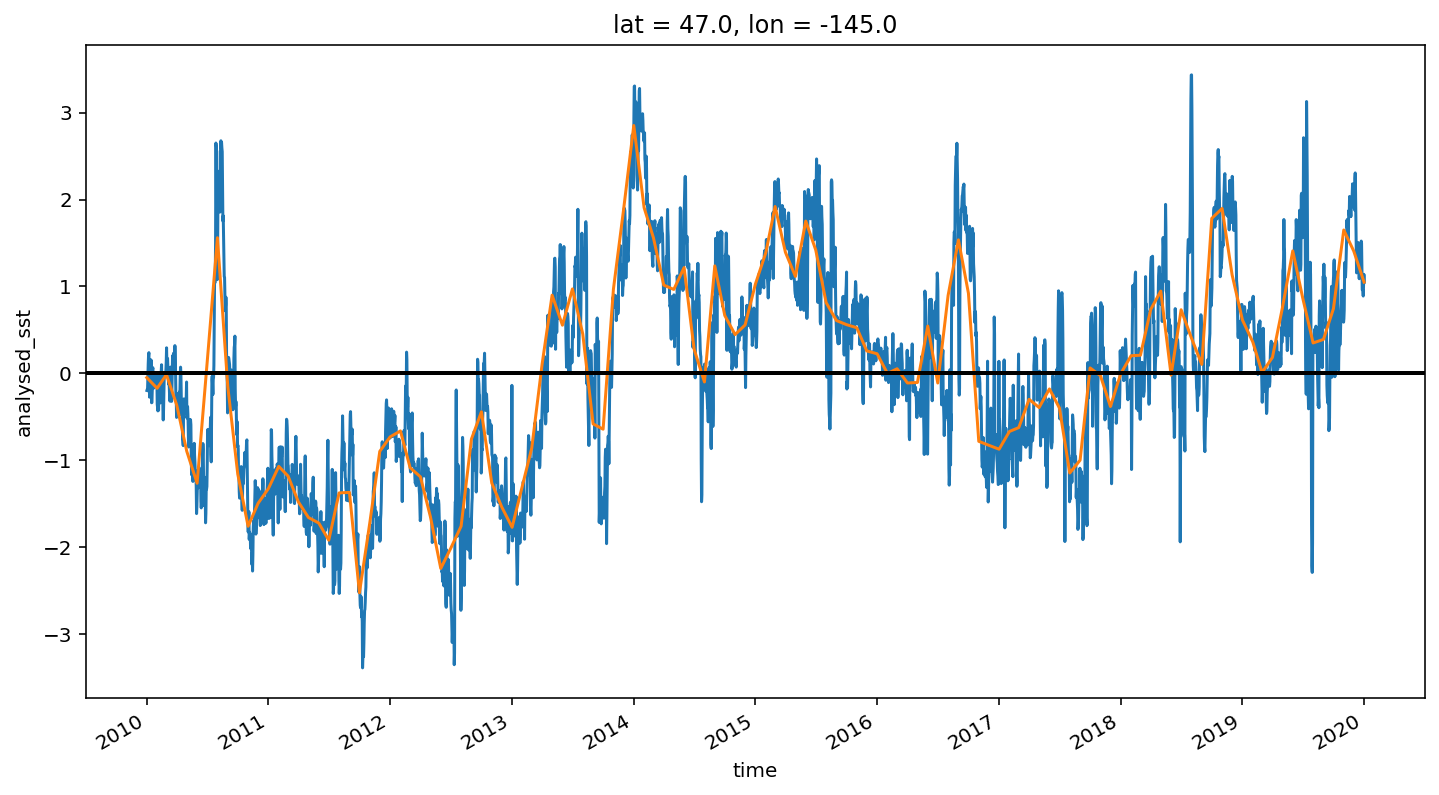

In [4]:
%%time

sst_climatology = sst_timeseries.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)

sst_anomaly = sst_timeseries.groupby('time.dayofyear')-sst_climatology

sst_anomaly_monthly = sst_anomaly.resample(time='1MS').mean(keep_attrs=True,skipna=False)

#plot the data
sst_anomaly.plot()
sst_anomaly_monthly.plot()
plt.axhline(linewidth=2,color='k')

# Chukchi Sea SST timeseries

# Note SST is set to -1.8 C (271.35 K) when ice is present

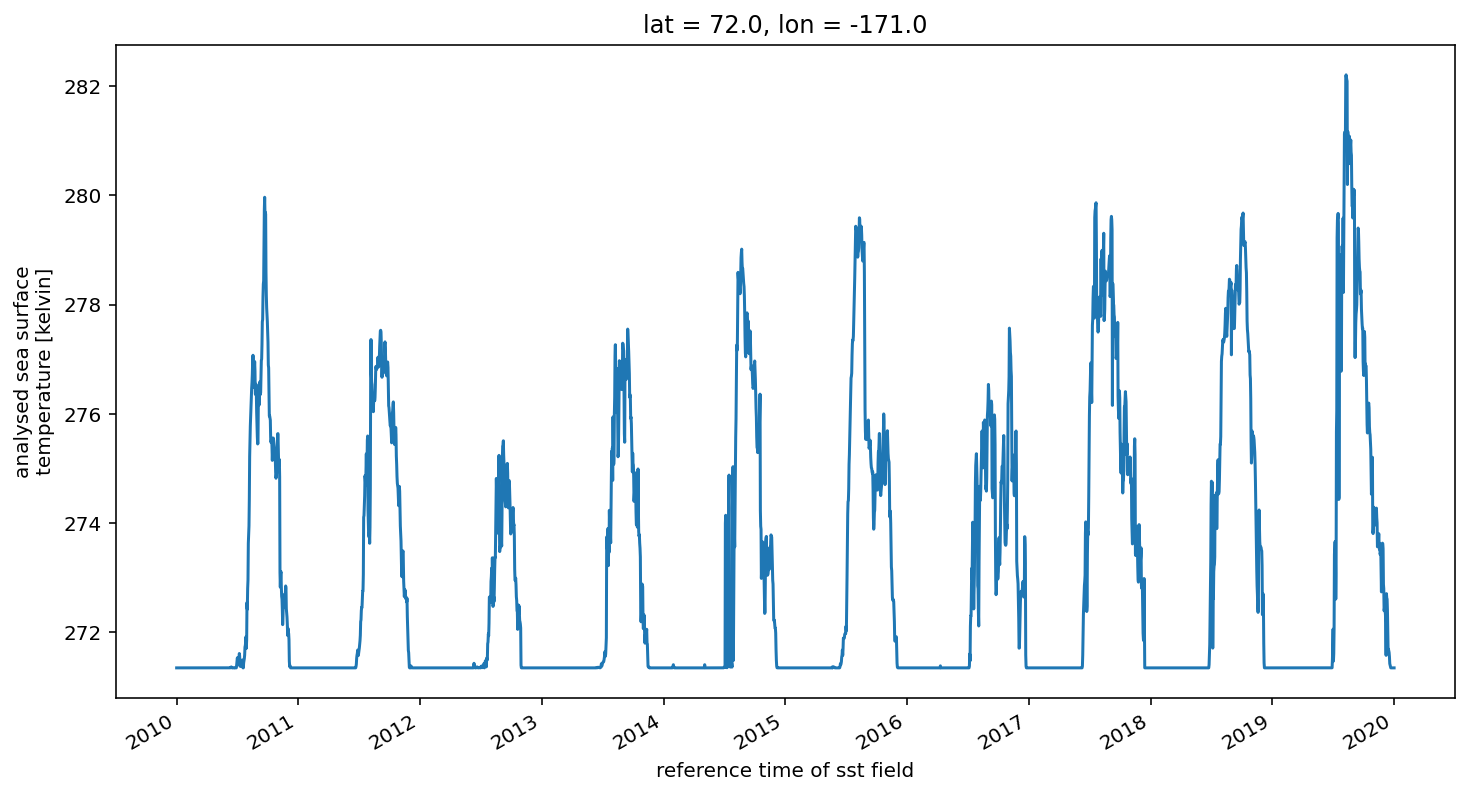

In [5]:
sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2010-01-01','2020-01-01'),
                                            lat  = 72,
                                            lon  = -171
                                           ).load()

sst_timeseries.plot()

# Grid resolution does NOT equal spatial resolution

- many L4 SST analyses blend infrared (~ 1 - 4 km data) with passive microwave (~ 50 km) data.  Data availability will determine regional / temporal changes in spatial resolution

- many L4 SST analyses apply smoothing filters that may further reduce resolution

CPU times: user 8.72 s, sys: 6.15 s, total: 14.9 s
Wall time: 12.9 s


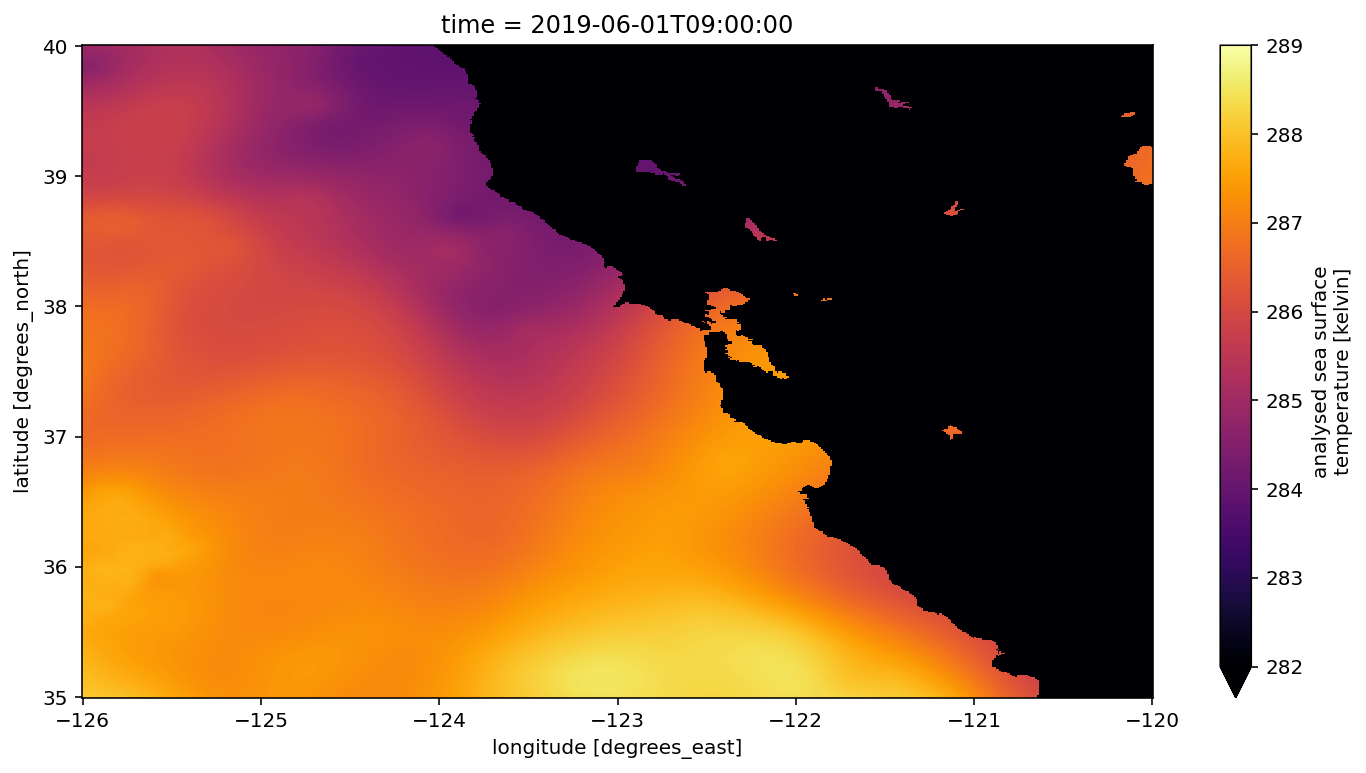

In [6]:
%%time

subset = ds_sst['analysed_sst'].sel(time='2019-06-01',lat=slice(35,40),lon=slice(-126,-120))

subset.plot(vmin=282,vmax=289,cmap='inferno')

CPU times: user 8.43 s, sys: 5.58 s, total: 14 s
Wall time: 8.7 s


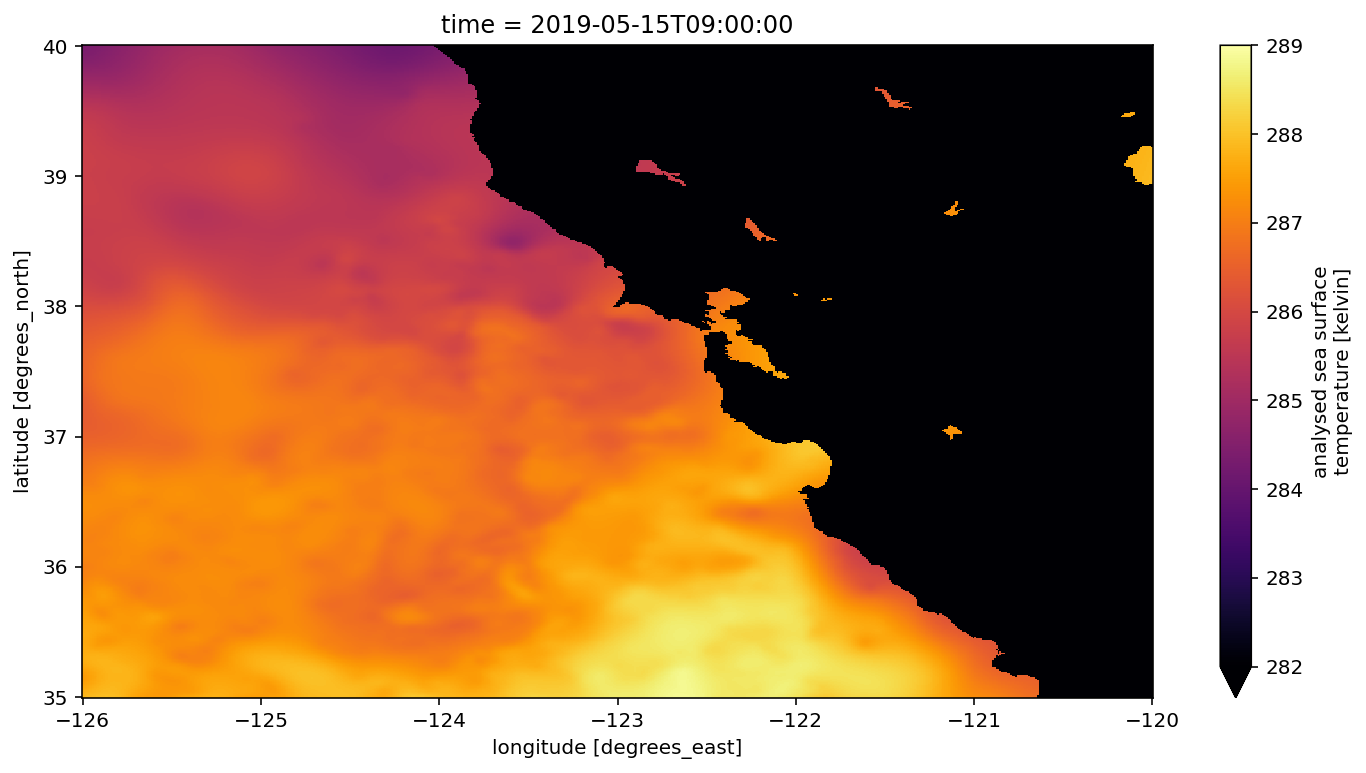

In [7]:
%%time

subset = ds_sst['analysed_sst'].sel(time='2019-05-15',lat=slice(35,40),lon=slice(-126,-120))

subset.plot(vmin=282,vmax=289,cmap='inferno')